# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [8]:
df.id.nunique(), df.shape

(569, (569, 32))

In [10]:
df = df.set_index('id')

In [21]:
# df = df.drop(columns={'Unnamed: 32'})
df.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [23]:
##### Your Code Here #####
# I'm going to make an elbow graph to get a quick idea of how many K's I want
data_transformed = df.loc[:,df.columns.tolist()].values

sum_of_squared_distances = []
K = range(1,31)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

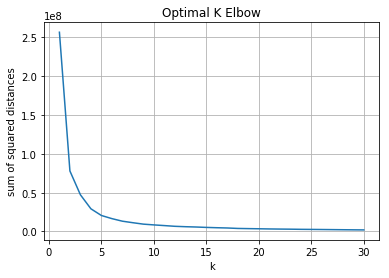

In [27]:
# Data for plotting
x = K
y = sum_of_squared_distances

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='k', ylabel='sum of squared distances',
       title='Optimal K Elbow')
ax.grid()

# fig.savefig("test.png")
plt.show()

This looks like our idea K is 4 or 5. Right there in the elbow.

In [29]:
# So let's try and do a k-means grouping with 5 Ks
kmeans = KMeans(n_clusters=5)

# put column data into X
# X = df.loc[:,df.columns.tolist()].values

kmeans.fit(df)
labels = kmeans.labels_

In [38]:
# add the labels to the df
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df_clusters = df.copy()

In [58]:
# Now I want to re-add the orignal labels and compare them to my clusters
# this will let me see if 5 KMeans was sufficient to predict cancer diagnosis

df_diagnosis = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
df_diagnosis = df_diagnosis.set_index('id')
df_check =  pd.merge(df_clusters, df_diagnosis['diagnosis'], left_index=True, right_index=True, how='left')

In [62]:
df_diagnosis['diagnosis'].nunique()

2

In [59]:
df_check['clusters'].nunique()

5

In [60]:
pd.crosstab(df_check['diagnosis'], df_check['clusters'])

clusters,0,1,2,3,4
diagnosis,,,,,
B,0,141,0,5,211
M,70,52,16,69,5


This result seems to suggest that our 5 clusters capture diagnosis == B quite well in clusters 1 and 4.

diagnosis == M does not seem to be captured by any cluster, so it may be time to attempt PCA.

In [68]:
# going for PCA, so first I will normalize our entire dataframe

dfp = df.drop(columns='clusters')

In [70]:
features = dfp.columns.tolist()

# seperate out features
x = df.loc[:, features].values

# standardize the features
x = StandardScaler().fit_transform(x)

In [76]:
pca = PCA(n_components=5)

principalComponents = pca.fit_transform(x)

principal_df = pd.DataFrame(data= principalComponents,
                           columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'], 
                            index=dfp.index)

In [77]:
# now I k-means this principal_df, by 5 I guess
means = KMeans(n_clusters=5)


kmeans.fit(principal_df)
labels = kmeans.labels_

# add the labels to the df
new_series = pd.Series(labels)
principal_df['clusters'] = new_series.values

# Now I want to re-add the orignal labels and compare them to my clusters

df_pca_check =  pd.merge(principal_df, df_diagnosis['diagnosis'], 
                     left_index=True, right_index=True, how='left')


In [79]:
# df_pca_check

In [84]:
pd.crosstab(df_pca_check['diagnosis'], df_pca_check['clusters'])

clusters,0,1,2,3,4
diagnosis,,,,,
B,0,198,21,0,138
M,95,23,54,35,5


# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

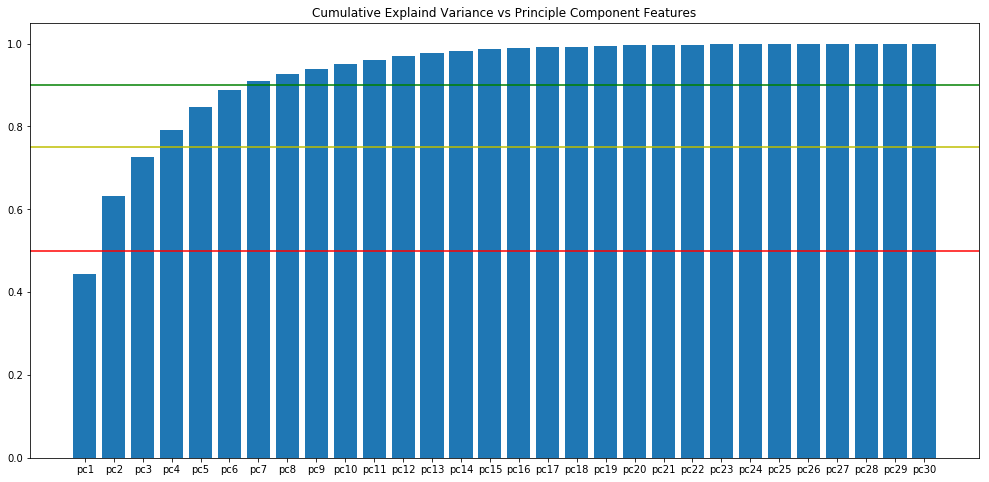

In [99]:
# Note, this code can from Will Cotton, a true math-OG
import statistics as stat

pca = PCA(n_components = 30)

principalComponents = pca.fit_transform(x)

labels = ['pc' + str(num) for num in range(1,31)]


principalComp = pd.DataFrame(data = principalComponents,
                            columns = labels)

std_devs = [stat.stdev(principalComp[col].values) for col in labels]
variances = [std**2 for std in std_devs]

sum_var = sum(variances)
prop_varex = [(variance/sum_var) for variance in variances]
j=0
cum_varex=np.zeros(30)
while j < len(variances):
  cum_varex[j] = sum(prop_varex[:j+1])
  j+=1
  
fig = plt.figure(figsize = (17,8));
fig.add_axes()
ax2=fig.add_subplot(111)
ax2.bar(x=labels, height=cum_varex)#, cmap = 'Greens')
ax2.axhline(0.5, color='r')
ax2.axhline(0.75, color='y')
ax2.axhline(0.9, color='g')
plt.title('Cumulative Explaind Variance vs Principle Component Features');

In [128]:
# based on Will's code, our ideal number of 
# PCAs should be 7 to explain 90% of var

# normalize dataframe

df_pca7 = df.drop(columns='clusters')

# define features as all columns
features = dfp.columns.tolist()

# seperate out features
x = df.loc[:, features].values

# standardize the features
x = StandardScaler().fit_transform(x)

# perform PCA @ 7 features 
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)

pca_labels = ['PC' + str(num) for num in range(1,8)]

principal_df = pd.DataFrame(data= principalComponents,
                           columns = [pca_labels], 
                            index=dfp.index)

In [129]:
# now I will make an elbow graph to see the ideal number of clusters
# for 7PCs

data_transformed = principal_df.loc[:,principal_df.columns.tolist()].values

sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

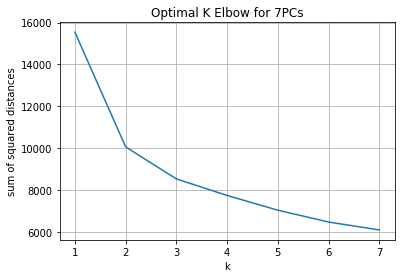

In [130]:
# Data for plotting
x = K
y = sum_of_squared_distances

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='k', ylabel='sum of squared distances',
       title='Optimal K Elbow for 7PCs')
ax.grid()

# fig.savefig("test.png")
plt.show()

In [168]:
# looks like 2 or 3 is going to give most of the joy here, I'll go for 3
pca_means = KMeans(n_clusters=3)

pca_means.fit(principal_df)
labels = pca_means.labels_

# add the labels to the df
new_series = pd.Series(labels)
principal_df['clusters'] = new_series.values

# Now I want to re-add the orignal labels and compare them to my clusters

df_pca_check =  pd.merge(principal_df, df_diagnosis['diagnosis'], 
                     left_index=True, right_index=True, how='left')


In [170]:
# fixing some messed up column headers
df_pca_check.columns = [str(s) for s in df_pca_check.columns]

In [171]:
# rename bad column headers
df_pca_check.columns = df_pca_check.columns.str.strip().str.lower().str.replace(',', '').str.replace('(', '').str.replace(')', '').str.replace('/', '').str.strip("'").str.replace("'", '')


# checking our clusters vs diagnosis
print('PC7 and optomized for 3 clusters')
pd.crosstab(df_pca_check['diagnosis'], df_pca_check['clusters'])

PC7 and optomized 


clusters,0,1,2
diagnosis,,,
B,0,340,17
M,128,31,53


So after optomizing we can identify cluster 0 as a highly malignant space, whereas clutser 1 is more benign than malignant, and cluster 2 is more malignant than benign.